# Assignment 1

Jingjing Lin

Dataset: "Hitters" from https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad
Using Lasso and Ridge Regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. 

## Regularization

##  1. Data preprocessing: cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
URL = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
hitters = pd.read_csv(URL, index_col=0)

In [3]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [5]:
# Perform data cleaning drop NA and non-numeric columns
hitters_clean = hitters._get_numeric_data().dropna()

In [6]:
hitters_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 17 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(16)
memory usage: 37.0+ KB


In [7]:
#set y and x 
y = hitters_clean['Salary']
X = hitters_clean.drop('Salary', axis = 1)
colname = X.columns

## 2. Lasso Regression

In [8]:
alphas = 10**np.linspace(10, -2, 100)*0.5
# alphas 

In [9]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs_lasso = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X),y)
    coefs_lasso.append(lasso.coef_)

NameError: name 'scale' is not defined

### 2.1 Visualization

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

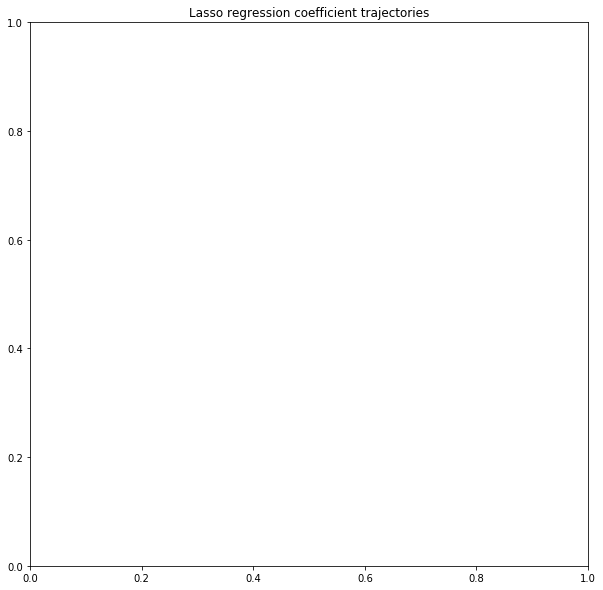

In [10]:
plt.figure(figsize = (10,10))
plt.title('Lasso regression coefficient trajectories')
ax = plt.gca()
ax.plot(alphas*2, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(colname)
plt.show()

Accroding to the graph above, the final three predictors that remain in the model are Hits, CRBI, and AtBat(or CRuns: the same color).

### 2.2 Cross-validation to find the optimal value of the regularization penalty

In [11]:
lassocv = LassoCV(alphas = None,cv = 10, max_iter = 100000, normalize = True)

In [12]:
lassocv_fit = lassocv.fit(X, y)
lassocv_alpha = lassocv_fit.alpha_
print('Optimal value of regularization penalty: ',lassocv_alpha)

Optimal value of regularization penalty:  0.0635481759985745


In [13]:
# Some features could be activated into "0" by applying Lasso function, so there are some features left:
pd.Series(lassocv.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

There are 14 features selected after applying Lasso: AtBat, Hits, Runs, RBI, Walks, Years, CAtBat, CHmRUN, CRuns, CRBI, CWalks, PutOuts, Assists, Errors.

## 3. Ridge Regression

In [14]:
#normalization setup
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

### 3.1 Perform Visualization

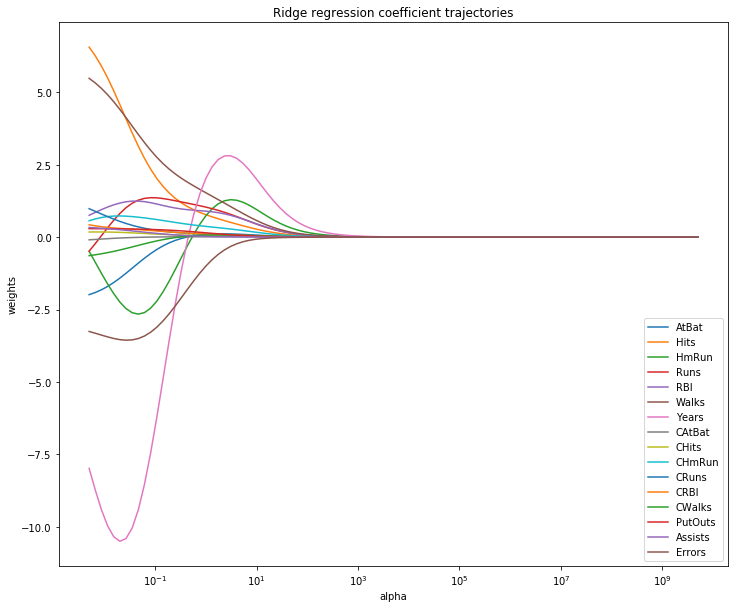

In [15]:
from sklearn.preprocessing import scale 

plt.figure(figsize = (12,10))
plt.title('Ridge regression coefficient trajectories')
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(colname)
plt.show()

Accroding to the graph above, the final three predictors that remain in the model are Years, HmRun, Walks

### 3.2 Cross-validation

 Use cross-validation to find the optimal value of the regularization penality.

In [16]:
ridgecv = RidgeCV(alphas = alphas,cv = 10, normalize = True)

In [17]:
ridgecv_fit = ridgecv.fit(X, y)
ridgecv_alpha = ridgecv_fit.alpha_
print('Optimal value of regularization penalty: ',ridgecv_alpha)

Optimal value of regularization penalty:  1.004616501282523


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
pd.Series(ridgecv.coef_, index=X.columns)

AtBat      0.094110
Hits       0.772112
HmRun      0.741821
Runs       1.034815
RBI        0.895719
Walks      1.529331
Years      2.035456
CAtBat     0.011242
CHits      0.052760
CHmRun     0.369415
CRuns      0.106245
CRBI       0.109876
CWalks     0.067129
PutOuts    0.148411
Assists    0.024807
Errors    -0.996215
dtype: float64

Ridge Function wont be able to reduce the coefficient of a feature into 0, so we could only tell the significance of each feature to the salary. 

## Short Answer

Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

Bias-variance tradeoff is a phenomenon or a scenario that data scientist should take into consideration when they are making predictive models. Both bias and variances are the errors of predictive models and the real-world situation. Models tend to be with high bias and low variances (we also called underfitting) if we fit relatively less data. That is because models tends to be more flexible with fewer limitations(less data has been trained), and vice versa. Find a balance of bias-variance to minimize the error of the model is the meaning of this "tradeoff" term.

Regularzation is one of effective ways to reduce relatively less significant features to avoid overfitting.
Both Lasso and Ridge formulas are used to detective the significance (weight) of each feature in the model.
The difference is Ridge regression can not zero out coefficients. 

According to (1), clearly some coeffcients have been shrinking down to 0 after using Lasso regression while none of coefficients became 0 in the Ridge Regression.